# Importing Libraries

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

# Importing Image Dataset

In [2]:
!pip install -q kaggle
!mkdir ~/.kaggle

In [3]:
!cp kaggle.json ~/.kaggle

In [4]:
!kaggle datasets download -d saumyamohandas/animal-dataset

100% 62.0M/62.3M [00:00<00:00, 97.2MB/s]
100% 62.3M/62.3M [00:00<00:00, 96.9MB/s]


In [ ]:
!unzip /content/animal-dataset.zip

# Image Pre Processing


In [6]:
from keras.preprocessing.image import ImageDataGenerator

In [7]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [16]:
x_train=train_datagen.flow_from_directory(r'/content/dataset/Training',target_size=(64,64),batch_size=32,class_mode="categorical")
x_test = test_datagen.flow_from_directory(r'/content/dataset/Testing',target_size = (64,64),batch_size = 32 , class_mode = 'categorical')

Found 1238 images belonging to 4 classes.
Found 326 images belonging to 4 classes.


In [17]:
print(x_train.class_indices)

{'bears': 0, 'crows': 1, 'elephants': 2, 'rats': 3}


# Model Building


In [8]:
model = Sequential()

In [9]:
model.add(Convolution2D(32,(3,3),input_shape = (64,64,3),activation="relu"))

In [10]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [11]:
model.add(Flatten())

In [12]:
model.add(Dense(units=128,activation="relu"))

In [13]:
model.add(Dense(units=4,activation="softmax"))

In [14]:
#Compile the model (loss fucntion,accuracy,optimizer)
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics="accuracy")

In [18]:
model.fit_generator(x_train,steps_per_epoch= 39,epochs = 10,validation_data = x_test,validation_steps = 10)

Epoch 1/10


<ipython-input-18-60bae3268c66>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train,steps_per_epoch= 39,epochs = 10,validation_data = x_test,validation_steps = 10)


39/39 [==============================] - 6s 133ms/step - loss: 1.7292 - accuracy: 0.3417 - val_loss: 1.1960 - val_accuracy: 0.3906
Epoch 2/10
39/39 [==============================] - 5s 128ms/step - loss: 1.0190 - accuracy: 0.5824 - val_loss: 0.7684 - val_accuracy: 0.6719
Epoch 3/10
39/39 [==============================] - 6s 149ms/step - loss: 0.8254 - accuracy: 0.6793 - val_loss: 0.6891 - val_accuracy: 0.7250
Epoch 4/10
39/39 [==============================] - 6s 149ms/step - loss: 0.7108 - accuracy: 0.7318 - val_loss: 0.7207 - val_accuracy: 0.7094
Epoch 5/10
39/39 [==============================] - 5s 129ms/step - loss: 0.6559 - accuracy: 0.7447 - val_loss: 0.5579 - val_accuracy: 0.7906
Epoch 6/10
39/39 [==============================] - 6s 143ms/step - loss: 0.5899 - accuracy: 0.7690 - val_loss: 0.6660 - val_accuracy: 0.7656
Epoch 7/10
39/39 [==============================] - 5s 125ms/step - loss: 0.5229 - accuracy: 0.7989 - val_loss: 0.4477 - val_accuracy: 0.8250
Epoch 8/10
39/39 

In [ ]:
# steps per epoch  =  no.of samples in your trainingset/batch size
# 1238/32=38.6=39

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
 dense (Dense)               (None, 128)               3936384   
                                                                 
 dense_1 (Dense)             (None, 4)                 516       
                                                                 
Total params: 3937796 (15.02 MB)
Trainable params: 3937796 (15.02 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [21]:
model.save("animal.keras")

# Testing Model

In [22]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [23]:
import tensorflow as tf

In [24]:
model=tf.keras.models.load_model(r"animal.keras",compile=False)

In [25]:
img=image.load_img(r"elephant.jpeg",target_size=(64,64))

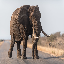

In [26]:
img

In [27]:
x=image.img_to_array(img)

In [28]:
x

array([[[229., 233., 236.],
        [227., 231., 234.],
        [224., 229., 233.],
        ...,
        [217., 224., 230.],
        [222., 227., 233.],
        [225., 230., 236.]],

       [[230., 234., 237.],
        [227., 231., 234.],
        [226., 230., 233.],
        ...,
        [221., 226., 232.],
        [223., 228., 234.],
        [225., 230., 236.]],

       [[229., 233., 236.],
        [228., 232., 235.],
        [226., 230., 233.],
        ...,
        [222., 227., 233.],
        [223., 228., 234.],
        [226., 231., 237.]],

       ...,

       [[176., 162., 153.],
        [167., 149., 139.],
        [168., 151., 143.],
        ...,
        [157., 138., 131.],
        [156., 142., 131.],
        [154., 137., 129.]],

       [[188., 171., 163.],
        [156., 139., 131.],
        [169., 152., 144.],
        ...,
        [142., 132., 123.],
        [154., 137., 129.],
        [157., 140., 130.]],

       [[166., 147., 140.],
        [167., 150., 142.],
        [163., 1

In [29]:
x.shape

(64, 64, 3)

In [31]:
x=np.expand_dims(x,axis=0)

In [32]:
x.ndim

4

In [33]:
x.shape

(1, 64, 64, 3)

In [34]:
pred=model.predict(x)

1/1 [==============================] - 0s 82ms/step


In [37]:
pred

array([[0., 0., 1., 0.]], dtype=float32)